#**3  Reinforcement Learning: SARSA and Q-Learning for Gridworld**

Consider the 9 × 9 gridworld example depicted in the figure 2 below. The blue gridcells represent
walls that cannot be traversed. The green cell represent a treasure and transition to this cell
yields a reward of +50 whereupon the episode is terminated (i.e. absorbing state). The red cell
represents the snakepit: this state is also absorbing and entering it yields a negative reward of −50.
All other cells represent regular states that are accessible to the agent. In each cell, the agent
can take four actions: move north, east, south or wes (not moving is NOT a valid action). These
actions result in a deterministic transition to the corresponding neighbouring cell. An action that
makes the agent bump into a wall or the grid-borders, leaves its state unchanged. All non-terminal
transitions (including running into walls or grid borders) incur a negative reward (”cost”) of −1.
For the questions below, we assume that the agent is not aware of all the above information
and needs to discover it by interacting with the environment (i.e. model-free setting).

Questions: Perform, compare and comment on, the following experiments:
1. Use SARSA in combination with greedification to search for an optimal policy.
2. Use Q-learning to search for an optimal policy. Implement two different update strategies:
(a) Direct updates: Update the Q-table while rolling out each sample path;
(b) Replay buffer: Collect the experiences (s, a, r, s′
) in a replay buffer and sample from
this buffer.
Compare the solutions and the corresponding computational effort for the three solution
strategies.

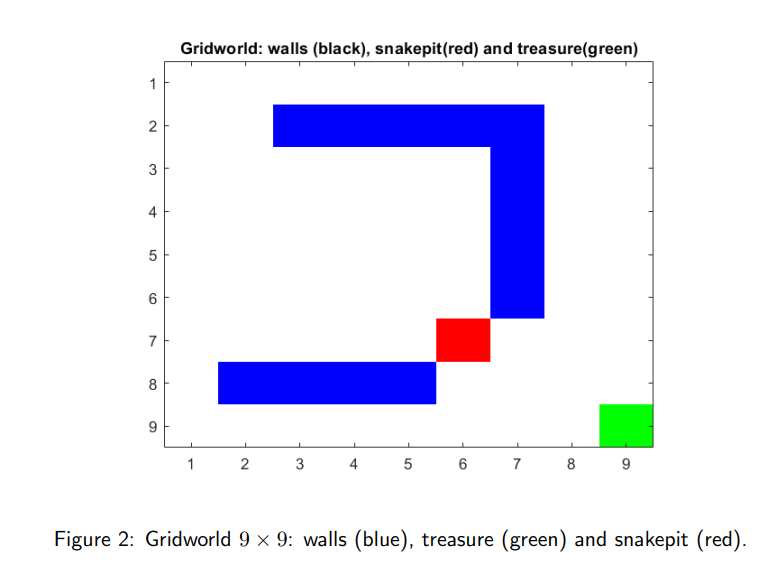

**Answer** 


C1 [['>' '>' '>' '>' 'v' '>' '>' 'v' 'v']
 ['>' '^' 'W' 'W' 'W' 'W' 'W' 'v' 'v']
 ['v' '>' '>' '^' '<' '>' 'W' 'v' 'v']
 ['v' '>' 'v' '^' '>' '^' 'W' 'v' 'v']
 ['v' '>' '^' '>' 'v' '^' 'W' 'v' 'v']
 ['v' 'v' '>' '>' 'v' '<' 'W' 'v' 'v']
 ['v' '<' '>' '>' '<' 'S' '>' '>' 'v']
 ['v' 'W' 'W' 'W' 'W' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' 'T']]


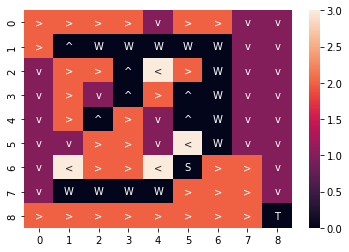

Heatmap for SARSA
Q_sanity_check
0 0 -1.0 [-7.37391897 -7.30859599 -2.3878027  -7.3833765 ]
0 1 -1.0 [-3.21519779 -7.03095324 -0.81008379 -6.48943296]
0 2 -1.0 [-6.66324764 -6.48862262  0.27722232 -5.70003647]
0 3 -1.0 [-6.13279887 -6.50846385  0.34228213 -6.3829308 ]
0 4 -1.0 [-4.46526857  0.28088412  0.12539859 -6.14604089]
0 5 -1.0 [-5.7016841  -5.49990322  0.50850626 -4.07280428]
0 6 -1.0 [-3.06452682e+00 -2.48050657e+00 -6.28655871e-04 -4.55559718e+00]
0 7 -1.0 [ 3.0254606   8.22647329 -4.70012264 -4.51903575]
0 8 -1.0 [-4.79134885 -4.45829151 -4.78255183 -4.51064128]
1 0 -1.0 [-7.18569451 -7.1309953  -7.06074947 -7.06971514]
1 1 -1.0 [-6.9410083  -6.98026163 -6.95531844 -7.06686061]
1 2 0.0 [0. 0. 0. 0.]
1 3 0.0 [0. 0. 0. 0.]
1 4 0.0 [0. 0. 0. 0.]
1 5 0.0 [0. 0. 0. 0.]
1 6 0.0 [0. 0. 0. 0.]
1 7 -1.0 [-4.74856565 12.67813262 -4.08773666 -4.33826078]
1 8 -1.0 [-4.56819279 -2.69617384 -4.37281214 -4.21632313]
2 0 -1.0 [-6.99224611 -6.91472879 -7.01213798 -7.03989714]
2 1 -1.0 [-6.95

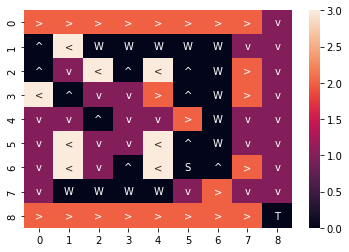

Heatmap for Qlearning_Direct updates
Q_sanity_check
0 0 -1.0 [-2.93086636 -6.90976931  2.34623461 -6.92643132]
0 1 -1.0 [-6.73848275 -6.80833221  3.72297979 -0.87326927]
0 2 -1.0 [-0.24814484  2.18213787  5.25016082 -6.28569119]
0 3 -1.0 [-0.42477485  4.49193266  6.94541019  0.78066906]
0 4 -1.0 [ 0.65523203 -5.54675743  8.82852559 -0.26159481]
0 5 -1.0 [-5.20393873  5.13774731 10.92068041  0.80600101]
0 6 -1.0 [ 6.97777287  7.04511315 13.24522395  3.93290241]
0 7 -1.0 [ 3.77218795 -3.21283135 15.82803162 -4.12389325]
0 8 -1.0 [ 6.06525682 18.69781385 10.82569375 -3.80688408]
1 0 -1.0 [-6.63734545 -6.70352436 -6.72281562 -6.76466455]
1 1 -1.0 [-6.73073035 -6.67934156 -6.66976475 -6.6222579 ]
1 2 0.0 [0. 0. 0. 0.]
1 3 0.0 [0. 0. 0. 0.]
1 4 0.0 [0. 0. 0. 0.]
1 5 0.0 [0. 0. 0. 0.]
1 6 0.0 [0. 0. 0. 0.]
1 7 -1.0 [-3.84616967  7.14203785 -3.48979052 -3.6975059 ]
1 8 -1.0 [-3.14474249 21.88645998 13.18125556 -1.62580068]
2 0 -1.0 [-6.47114894 -6.50855407 -6.56446967 -6.53845173]
2 1 -1.0 [-6

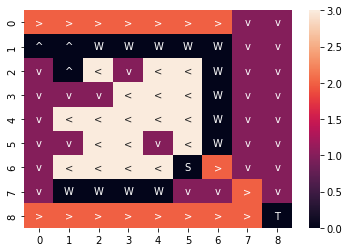

Heatmap for Qlearning_Replay buffer
Q_sanity_check
0 0 -1.0 [ 1.01075384 -0.0038164   2.35346792  1.06318939]
0 1 -1.0 [2.35109948 1.09518462 3.72607547 1.08140136]
0 2 -1.0 [3.62219898 3.72289977 5.25119497 2.34909093]
0 3 -1.0 [5.24060341 5.23779013 6.94577219 3.70789632]
0 4 -1.0 [6.91195813 6.93729653 8.82863577 5.24842707]
0 5 -1.0 [ 8.82226576  8.82845271 10.92070641  6.84456184]
0 6 -1.0 [10.91939651 10.92030758 13.24522934  8.82761347]
0 7 -1.0 [13.2388038  15.8280326  10.87070168 10.92063457]
0 8 -1.0 [10.74382626 13.36980217 10.90275085 13.21772959]
1 0 -1.0 [ 1.11696243  0.50331455  0.28205749 -0.02169781]
1 1 -1.0 [ 2.34718045 -0.10414846  1.04036815 -0.00590898]
1 2 0.0 [0. 0. 0. 0.]
1 3 0.0 [0. 0. 0. 0.]
1 4 0.0 [0. 0. 0. 0.]
1 5 0.0 [0. 0. 0. 0.]
1 6 0.0 [0. 0. 0. 0.]
1 7 -1.0 [13.24432077 18.697814   14.40077298 15.82671726]
1 8 -1.0 [10.32416591 18.17779154 14.22446411 15.82649246]
2 0 -1.0 [-4.49956032e-02  2.55582436e+00 -8.21439357e-02 -1.57781234e-03]
2 1 -1.0 [ 1.

In [48]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import random


class RL_Agent:
    def __init__(self):
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.pg_matrix = self.pg_rep()
        self.action_map = {0: "N", 1: "S", 2: "E", 3: "W"}
        self.direction_map = {0:'^', 1:'v', 2:'>', 3:'<'}

    def pg_rep(self):

        pg_matrix = np.zeros((9,9))
        #Wall
        W = [(1,2), (1,3), (1,4), (1,5), (1,6), (2,6), (3,6), (4,6), (5,6), (7,1),(7,2),(7,3),(7,4)]  
        #Snakepit
        S = [(6,5)]
        #Treasure
        T = [(8,8)]

        for i in range(9):
            for j in range(9):
                if (i,j) in W:
                    pg_matrix[i,j] = 0
                elif (i,j) in S:
                    pg_matrix[i,j] = -50
                elif (i,j) in T:
                    pg_matrix[i,j] = 50
                else:
                    pg_matrix[i,j] = -1

        return pg_matrix

    def plot_pg(self):


        #This will get plot the grid with 4 distinct colors
        # 0 - Black
        # -1 - Blue
        # -50 - Red
        # 50 - Green

        cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue', 'yellow', 'white', 'black'])
        sns.heatmap(self.pg_matrix, annot=True, cmap=cmap)

        plt.show()
        plt.imshow(self.pg_matrix, cmap=cmap, vmin=-50, vmax=50)

        plt.show()


    def epsilon_greedy(self, Q, state, epsilon):
        #Choose A from S using policy derived from Q (epsilon-greedy)

        # Exploit
        action = np.argmax(Q[state[0], state[1], :])

        if np.random.uniform(0,1) < epsilon:
            #Explore
            action = np.random.choice([x for x in range(4)])

        return action

    def take_action(self, state, action):

        action = self.action_map[action]
        #Take action, observe r, s'
        if action == "N":
            #Move Up
            if state[0] == 0:
                s_prime = state
                r = -1
            else:
                s_prime = (state[0] - 1, state[1])

        elif action == "S":
            #Move Down
            if state[0] == 8:
                s_prime = state
                r = -1
            else:
                s_prime = (state[0] + 1, state[1])

        elif action == "E":
            #Move Right
            if state[1] == 8:
                s_prime = state
                r = -1
            else:
                s_prime = (state[0], state[1] + 1)

        elif action == "W":
            #Move Left
            if state[1] == 0:
                s_prime = state
                r = -1
            else:
                s_prime = (state[0], state[1] - 1)

        #Check if s' is a wall
        if self.pg_matrix[s_prime[0], s_prime[1]] == 0:
            s_prime = state
            r= -1

        if not s_prime == state:
            r = self.pg_matrix[s_prime[0], s_prime[1]]

        return s_prime, r

    def SARSA(self, alpha, gamma, epsilon, max_episodes, max_steps):
        Q = np.zeros((9,9,4))
        for episode in range(max_episodes):
            s = (0, 0)
            a = self.epsilon_greedy(Q, s, epsilon)

            for step in range(max_steps):
                s_prime, r = self.take_action(s, a)
                a_prime = self.epsilon_greedy(Q, s_prime, epsilon)
                Q[s[0], s[1], a] = Q[s[0], s[1], a] + alpha*(r + gamma*Q[s_prime[0], s_prime[1], a_prime] - Q[s[0], s[1], a])
                s = s_prime
                a = a_prime
                if r == 50 or r == -50:
                    break

        return Q

    def Q_learning(self, alpha, gamma, epsilon, max_episodes, max_steps):
        Q = np.zeros((9,9,4))

        for episode in range(max_episodes):
            s = (0, 0)
            for step in range(max_steps):
                a = self.epsilon_greedy(Q, s, epsilon)
                s_prime, r = self.take_action(s, a)
                Q[s[0], s[1], a] = Q[s[0], s[1], a] + alpha*(r + gamma*np.max(Q[s_prime[0], s_prime[1], :]) - Q[s[0], s[1], a])
                s = s_prime
                if r == 50 or r == -50:
                    break
        return Q


    def dyna_Q(self, alpha, gamma, epsilon, max_episodes, max_steps, n):

        #Dyna-Q
        Q = np.zeros((9,9,4))
        model = {}
        for episode in range(max_episodes):
            s = (0, 0)
            if episode % 100 == 0:
                print("Episode: ", episode)

            for step in range(max_steps):
                a = self.epsilon_greedy(Q, s, epsilon)
                s_prime, r = self.take_action(s, a)
                Q[s[0], s[1], a] = Q[s[0], s[1], a] + alpha*(r + gamma*np.max(Q[s_prime[0], s_prime[1], :]) - Q[s[0], s[1], a])
                model[(s, a)] = (s_prime, r)
                s = s_prime
                if r == 50 or r == -50:

                    break
            for i in range(n):
                s_ran, a_ran = random.choice(list(model.keys()))
                s_prime_ran, r_ran = model[(s_ran, a_ran)]
                Q[s_ran[0], s_ran[1], a_ran] = Q[s_ran[0], s_ran[1], a_ran] + alpha * (
                        r_ran + gamma * np.max(Q[s_prime_ran[0], s_prime_ran[1], :]) - Q[s_ran[0], s_ran[1], a_ran])

        return Q


    def Q_sanity_check(self, Q):

        print("Q_sanity_check")
        for i in range(9):
            for j in range(9):
                print(i,j,self.pg_matrix[i,j], Q[i,j,:])


    def best_Q(self, Q):

        best_action = np.argmax(Q, axis=2)
        best_action_dir = np.vectorize(self.direction_map.get)(best_action)
        for i in range(9):
            for j in range(9):
                if self.pg_matrix[i,j] == 0:
                    best_action_dir[i,j] = "W"
                elif self.pg_matrix[i,j] == -50:
                    best_action_dir[i,j] = "S"
                elif self.pg_matrix[i,j] == 50:
                    best_action_dir[i,j] = "T"

        print("C1",best_action_dir)

        cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue'])#, 'yellow', 'white', 'black'])
        sns.heatmap(best_action,annot=best_action_dir, fmt="")
        #plt.imshow(best_action_dir)
        plt.show()



def main():
    agent = RL_Agent()
   # agent.plot_pg()
    Q = agent.SARSA(agent.alpha, agent.gamma, agent.epsilon, 100, 100)
    agent.best_Q(Q)
    print("Heatmap for SARSA")
    agent.Q_sanity_check(Q)

    agent2 = RL_Agent()
    Q2 = agent2.Q_learning(agent.alpha, agent.gamma, agent.epsilon, 100, 100)
    agent2.best_Q(Q2)
    print("Heatmap for Qlearning_Direct updates")
    agent.Q_sanity_check(Q2)

    agent3 = RL_Agent()
    Q3 = agent3.dyna_Q(agent.alpha, agent.gamma, agent.epsilon, 100, 100, 50)
    agent3.best_Q(Q3)
    print("Heatmap for Qlearning_Replay buffer")
    agent.Q_sanity_check(Q3)

if __name__ == "__main__":
    main()